# Hyperparameter Database Project


## Abstract

This project aims to create database consisting of hyperparameters for all models generated for a particular runtime for a dataset. Here we are making use of H20 AutoML library which generates models for each runtime and gets all hyperparameters for each model.

### Aim/Purpose of Research
This project aims to create database consisting of hyperparameters for all models generated for a particular runtime for a dataset. Here we are making use of H20 AutoML library which generates models for each runtime and gets all hyperparameters for each model.


### Methods Used :

Exploratory Data Analysis, H20 library. 

### About the dataset

Dataset has been taken from Kaggle : Travel Insurance Claims. This dataset displays information about the travel insurance claims filed by the candidate. 

#### Number of records: 
63,327 

#### Number of attributes:
11

#### Type of problem: 
Binary classification, regression

#### Type of variables:
Numeric, date, categorical , binary.

#### Target attribute:
Claim

### Exploratory Data Analysis 

We are performing Exploratory Data Analysis to look for correlations between variables , relationships, finding % of correct data, missing values and plotting graphs. This is essential for any kind of model building.  

In [2]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmp23lf60vu
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmp23lf60vu\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmp23lf60vu\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_Ashmita_c928pu
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, make_scorer

In [4]:
# importing the dataset
df=pd.read_csv("travel insurance.csv", decimal = ',')

In [5]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [6]:
df.describe()

,Duration,Age
count,63326.000000,63326.000000
mean,49.317074,39.969981
std,101.791566,14.017010
min,-2.000000,0.000000
25%,9.000000,35.000000
50%,22.000000,36.000000
75%,53.000000,43.000000
max,4881.000000,118.000000


In [7]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [8]:
df.info
df.shape

(63326, 11)

In [9]:
df.dtypes

Agency                  object
Agency Type             object
Distribution Channel    object
Product Name            object
Claim                   object
Duration                 int64
Destination             object
Net Sales               object
Commision (in value)    object
Gender                  object
Age                      int64
dtype: object

### Data Cleaning 

Data Cleaning is important as it provides information which is more useful and can provide better insights to make informed decisions. 

Steps involved in data cleaning process of this dataset is as follows: 
1. Checking of null values. 
2. Handling of null values if possible and dropping columns which are not necessary.  
3. Categorical encoding.

In [10]:
# Checking for null values
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [12]:
df.isnull().sum().sum()


45107

In [13]:
df = df.drop(['Gender'], axis=1)

In [14]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [15]:
df.corr()

,Duration,Age
Duration,1.000000,0.002468
Age,0.002468,1.000000


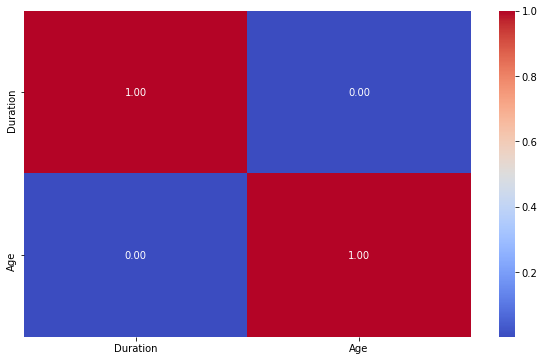

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [18]:
#renaming columns such as Net Sales and Commision(in value) for better clarity.
df.rename(columns={'Net Sales':'Net_Sales',
                          'Commision (in value)':'commision_invalue'}, 
                 inplace=True)

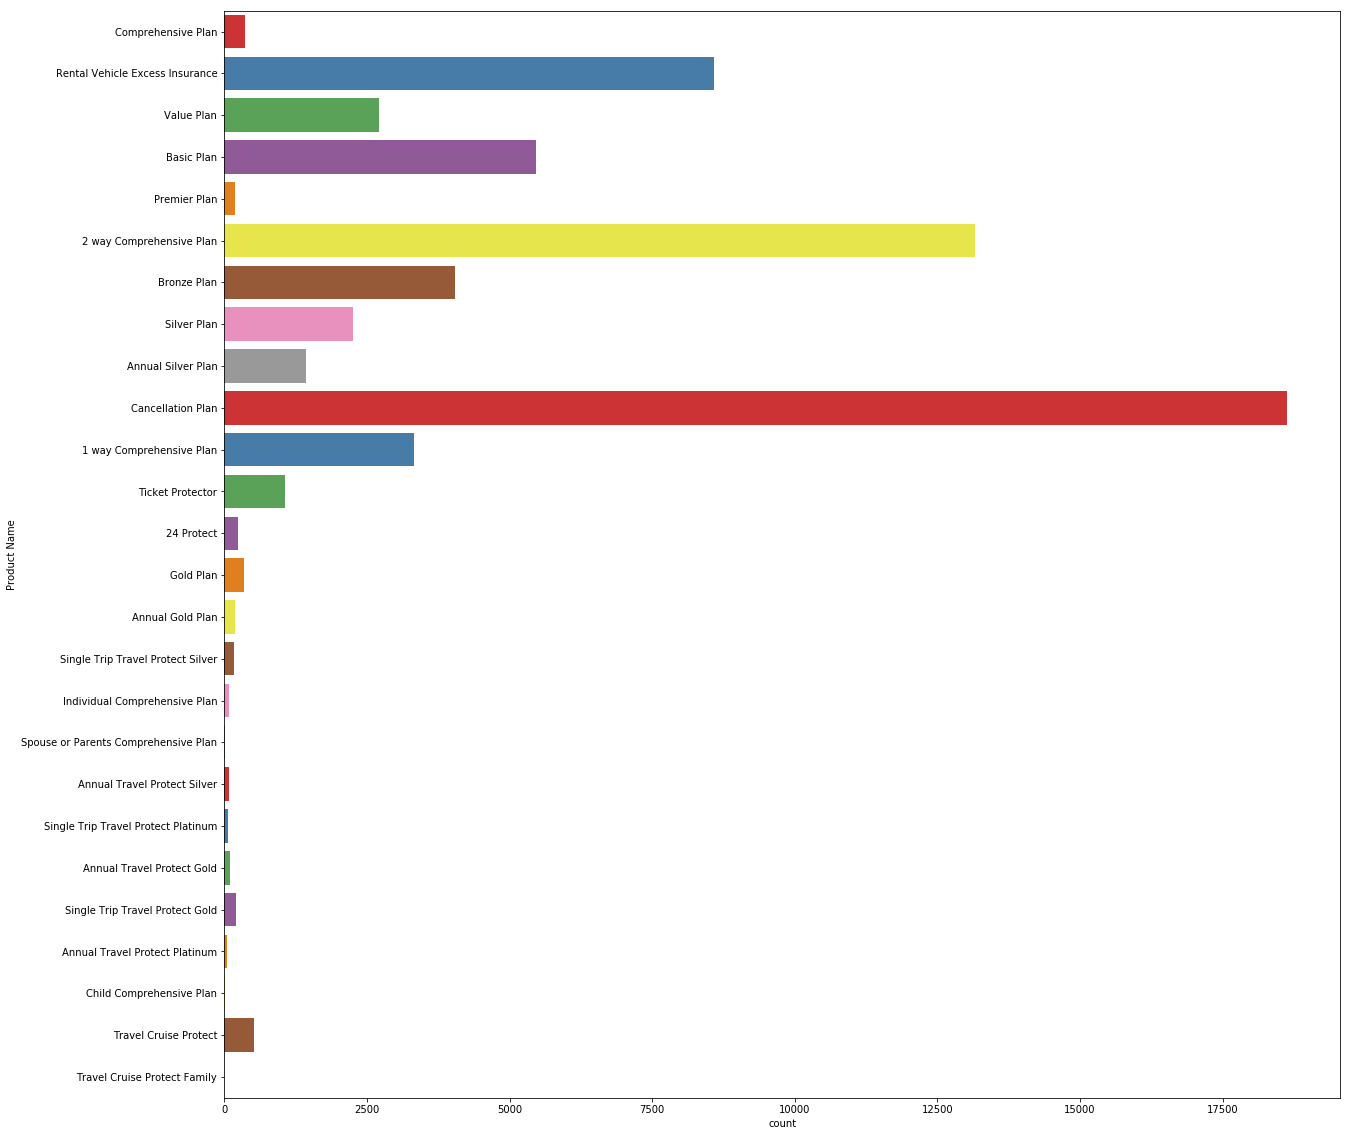

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.countplot(y="Product Name", data=df, palette="Set1",);

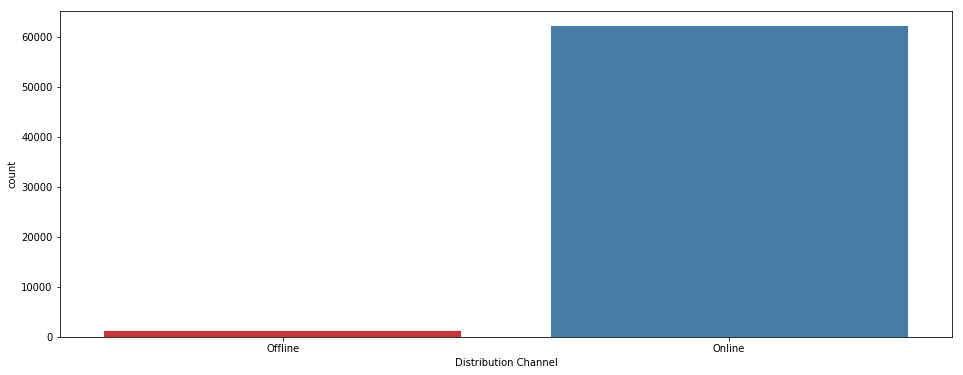

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.countplot(x="Distribution Channel", data=df, palette="Set1",);

In [ ]:
# choose attributes which shows relation
x = df[['Agency','Agency Type','Product Name','Distribution Channel','Claim','Duration','Destination','Net_Sales','commision_invalue']]
bins = 10
sns.pairplot(x)

We see that most of the claims were from Online Channel rather than Offline channel. 

### Categorical Encoding 

In [24]:
#one hot encode
agency={"Agency Type":{"Travel Agency":1,"Airlines":2}}
df.replace(agency, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,Online,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [25]:
#one hot encode
distribution_channel={"Distribution Channel":{"Offline":1,"Online":2}}
df.replace(distribution_channel, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,2,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,2,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,2,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,2,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,2,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,2,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,2,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,2,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [26]:
#one hot encode
gender={"Gender ":{"F":1,"M":2, np.nan:3}}
df.replace(gender, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,2,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,2,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,2,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,2,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,2,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,2,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,2,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,2,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [27]:
df['Agency'] = pd.DataFrame(df['Agency'])
df['Agency']=df['Agency'].astype("category").cat.codes
df['Agency'].head(10)

0    3
1    3
2    6
3    6
4    6
5    9
6    6
7    6
8    6
9    6
Name: Agency, dtype: int8

In [28]:
df['Product Name'] = pd.DataFrame(df['Product Name'])
df['Product Name']=df['Product Name'].astype("category").cat.codes
df['Product Name'].head(10)

0    12
1    12
2    16
3    16
4    16
5    25
6    16
7    16
8    16
9    16
Name: Product Name, dtype: int8

In [29]:
df['Destination'] = pd.DataFrame(df['Destination'])
df['Destination']=df['Destination'].astype("category").cat.codes
df['Destination'].head(10)

0     79
1     79
2      4
3      4
4     61
5    140
6    140
7      4
8    129
9      4
Name: Destination, dtype: int16

In [30]:
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,3,1,1,12,No,186,79,-29,9.57,81
1,3,1,1,12,No,186,79,-29,9.57,71
2,6,1,2,16,No,65,4,-49.5,29.7,32
3,6,1,2,16,No,60,4,-39.6,23.76,32
4,6,1,2,16,No,79,61,-19.8,11.88,41
5,9,2,2,25,No,66,140,-121,42.35,44
6,6,1,2,16,No,47,140,-39.6,23.76,32
7,6,1,2,16,No,63,4,-108.9,65.34,29
8,6,1,2,16,No,57,129,-19.8,11.88,44
9,6,1,2,16,No,186,4,-99,59.4,37


### Plotting graphs and data visualization 

We will be plotting few graphs to check for outliers, histogram, dist plots. 

In [31]:
df.corr()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Age
Agency,1.000000,-0.207529,-0.191928,0.138890,-0.076735,-0.208348,0.126357
Agency Type,-0.207529,1.000000,0.076895,0.272308,0.111588,0.150909,0.221503
Distribution Channel,-0.191928,0.076895,1.000000,-0.155318,-0.040856,-0.052289,-0.159644
Product Name,0.138890,0.272308,-0.155318,1.000000,-0.048609,-0.069257,0.273164
Duration,-0.076735,0.111588,-0.040856,-0.048609,1.000000,0.074720,0.002468
Destination,-0.208348,0.150909,-0.052289,-0.069257,0.074720,1.000000,-0.041579
Age,0.126357,0.221503,-0.159644,0.273164,0.002468,-0.041579,1.000000


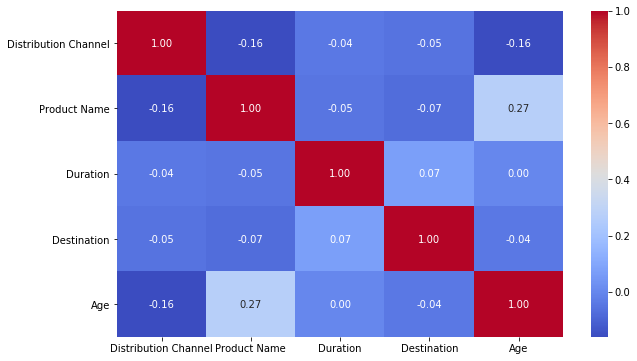

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

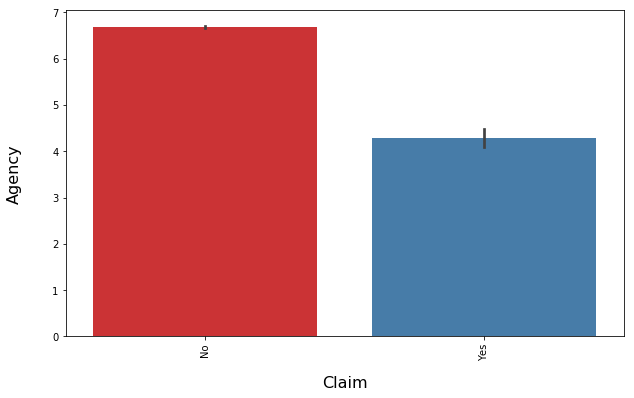

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Claim', y='Agency', data=df, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

### H20 AutoML : Automated Machine Learning

H20 is an open-source softwar used for data analysis and model building. It allows users to fit different models inorder to discover trends in data.We need to use different run time values and we observe the difference in model building and metrics. 

### For runtime 500sec

In below lines of code, we will be defining functions to generate runid folders and metadata folder creation. It will generate logs for the same. We will be specifying runtime value as 500 seconds. 

In [33]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='Claim'
nthreads=1 
min_mem_size=6 
run_time=500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

66Az1SQUw


In [34]:
print(run_dir)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\66Az1SQUw


In [35]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\66Az1SQUw\logs   66Az1SQUw_autoh2o_log.zip


In [39]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [40]:
metadata = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1556306777.5903018, 'target': 'Claim', 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 500, 'run_id': '66Az1SQUw', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556306777.5903018, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [41]:
#generating metadata values
generate_md = pd.DataFrame.from_dict(metadata , orient='index')
generate_md

,0
start_time,1.55631e+09
target,Claim
server_path,C:\Users\Ashmita\Desktop\Data Science Assignme...
data_path,None
test_path,None
max_models,9
run_time,500
run_id,66Az1SQUw
scale,False
classification,False


Generating data and converting data into CSV format. 

In [42]:
#dict_to_json(generate_md,n)
generate_md.to_csv('metadata_500.csv')

In [43]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

4


In [44]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:7477 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmp51yog5g0
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmp51yog5g0\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmp51yog5g0\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:7477
Connecting to H2O server at http://127.0.0.1:7477 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_Ashmita_odorti
H2O cluster total nodes:,1
H2O cluster free memory:,3.834 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [45]:
df.to_csv('train_500.csv')

In [46]:
data_path='train_500.csv'


In [47]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [48]:
train_data.head(5)

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,1,12,No,186,79,-29,9.57,81
1,3,1,1,12,No,186,79,-29,9.57,71
2,6,1,2,16,No,65,4,-49.5,29.7,32
3,6,1,2,16,No,60,4,-39.6,23.76,32
4,6,1,2,16,No,79,61,-19.8,11.88,41


In [49]:
target = 'Claim'

In [50]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [51]:
print(y)

Claim


In [52]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Age', 'Net Sales', 'Commision (in value)']
Claim


In [53]:
# setup autoML
run_time=500
aml = H2OAutoML(max_runtime_secs=run_time)

We start building the model as per the runtime specified above. 

In [55]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [56]:
# view the leaderboard
show_leader_board = aml.leaderboard
show_leader_board

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_1_AutoML_20190426_152728,0.826113,0.0679396,0.378901,0.121452,0.0147505
GBM_2_AutoML_20190426_152728,0.82322,0.0658032,0.366314,0.118961,0.0141517
GBM_grid_1_AutoML_20190426_152728_model_1,0.822651,0.0659415,0.339459,0.117978,0.0139188
GBM_3_AutoML_20190426_152728,0.820325,0.0662745,0.357768,0.119136,0.0141934
GBM_5_AutoML_20190426_152728,0.80926,0.0665435,0.365716,0.1185,0.0140423
GBM_4_AutoML_20190426_152728,0.807229,0.0684361,0.395271,0.12038,0.0144912
StackedEnsemble_BestOfFamily_AutoML_20190426_152728,0.798364,0.0688822,0.393747,0.119423,0.0142618
StackedEnsemble_AllModels_AutoML_20190426_152728,0.787298,0.0678153,0.325225,0.119103,0.0141855
DeepLearning_1_AutoML_20190426_152728,0.774377,0.0712108,0.397134,0.119226,0.0142147
GBM_grid_1_AutoML_20190426_152728_model_3,0.773521,0.076102,0.36768,0.120069,0.0144165


In [57]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [58]:
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_1_AutoML_20190426_152728,0.826113,0.067940,0.378901,0.121452,0.014751
1,GBM_2_AutoML_20190426_152728,0.823220,0.065803,0.366314,0.118961,0.014152
2,GBM_grid_1_AutoML_20190426_152728_model_1,0.822651,0.065941,0.339459,0.117978,0.013919
3,GBM_3_AutoML_20190426_152728,0.820325,0.066274,0.357768,0.119136,0.014193
4,GBM_5_AutoML_20190426_152728,0.809260,0.066543,0.365716,0.118500,0.014042
5,GBM_4_AutoML_20190426_152728,0.807229,0.068436,0.395271,0.120380,0.014491
6,StackedEnsemble_BestOfFamily_AutoML_20190426_1...,0.798364,0.068882,0.393747,0.119423,0.014262
7,StackedEnsemble_AllModels_AutoML_20190426_152728,0.787298,0.067815,0.325225,0.119103,0.014186
8,DeepLearning_1_AutoML_20190426_152728,0.774377,0.071211,0.397134,0.119226,0.014215
9,GBM_grid_1_AutoML_20190426_152728_model_3,0.773521,0.076102,0.367680,0.120069,0.014417


In [59]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
print(model_set)
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

0                          GBM_1_AutoML_20190426_152728
1                          GBM_2_AutoML_20190426_152728
2             GBM_grid_1_AutoML_20190426_152728_model_1
3                          GBM_3_AutoML_20190426_152728
4                          GBM_5_AutoML_20190426_152728
5                          GBM_4_AutoML_20190426_152728
6     StackedEnsemble_BestOfFamily_AutoML_20190426_1...
7      StackedEnsemble_AllModels_AutoML_20190426_152728
8                 DeepLearning_1_AutoML_20190426_152728
9             GBM_grid_1_AutoML_20190426_152728_model_3
10                         XRT_1_AutoML_20190426_152728
11            GLM_grid_1_AutoML_20190426_152728_model_1
12                         DRF_1_AutoML_20190426_152728
13            GBM_grid_1_AutoML_20190426_152728_model_2
14    DeepLearning_grid_1_AutoML_20190426_152728_mod...
15    DeepLearning_grid_1_AutoML_20190426_152728_mod...
Name: model_id, dtype: object


pandas.core.series.Series

In [60]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_1_AutoML_20190426_152728
GBM_2_AutoML_20190426_152728
GBM_grid_1_AutoML_20190426_152728_model_1
GBM_3_AutoML_20190426_152728
GBM_5_AutoML_20190426_152728
GBM_4_AutoML_20190426_152728
StackedEnsemble_BestOfFamily_AutoML_20190426_152728
StackedEnsemble_AllModels_AutoML_20190426_152728
DeepLearning_1_AutoML_20190426_152728
GBM_grid_1_AutoML_20190426_152728_model_3
XRT_1_AutoML_20190426_152728
GLM_grid_1_AutoML_20190426_152728_model_1
DRF_1_AutoML_20190426_152728
GBM_grid_1_AutoML_20190426_152728_model_2
DeepLearning_grid_1_AutoML_20190426_152728_model_1
DeepLearning_grid_1_AutoML_20190426_152728_model_2


In [61]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190426_152728', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190426_152728'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column':

In [62]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_500.json') 
hyperparameter_json(metadata,'meta_data_500.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

In [63]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     aml_leaderboard_df.to_csv('models_metrics_500.csv')

In [64]:
pd.read_json(json.dumps(jsonDicts)).to_csv('hyperparameters_500.csv' , index= False)

### Finding the best hyperparameters for each model

Here, we will make use of GridSearchCV and RandomSearchCV to find the best hyperparameters for each model. 

We are using AUC as metric to decide the performance and hyperparameters. We will try to check the values of hyperparameter values during training and validating dataset. 

In [129]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

splitds = train_data.split_frame(seed = 1)
#train = splitds[0]
#test = splitds[1]
#valid = splitds[2]
train,valid,test = train_data.split_frame(ratios=[0.8,0.09],seed=123)

gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

#search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}
# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1
                          )

In [130]:
gbm_grid1.train(x=X, y=y,
                training_frame=train_data,
                validation_frame=valid,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [131]:
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf1

       col_sample_rate learn_rate max_depth sample_rate            model_ids  \
0                  1.0        0.1         9         0.8  gbm_grid1_model_126   
1                  1.0        0.1         9         0.8  gbm_grid1_model_103   
2                  1.0        0.1         9         0.8   gbm_grid1_model_67   
3                  1.0        0.1         9         0.8   gbm_grid1_model_18   
4                  0.5        0.1         9         0.8  gbm_grid1_model_125   
5                  0.5        0.1         9         0.8  gbm_grid1_model_108   
6                  1.0        0.1         9         1.0   gbm_grid1_model_85   
7                  1.0        0.1         9         1.0  gbm_grid1_model_144   
8                  0.5        0.1         9         0.8   gbm_grid1_model_72   
9                  0.5        0.1         9         0.8   gbm_grid1_model_17   
10                 1.0        0.1         9         1.0   gbm_grid1_model_49   
11                 1.0        0.1       

In [132]:
# Grab the top GBM model, chosen by validation AUC
best_gbm1 = gbm_gridperf1.models[0]
best_gbm1

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_126


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.007350258598580669
RMSE: 0.08573364916169536
LogLoss: 0.030002259436674894
Mean Per-Class Error: 0.06730048141831713
AUC: 0.9840864476692285
pr_auc: 0.8078031879835974
Gini: 0.968172895338457
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.188279871272478: 


,No,Yes,Error,Rate
No,62246.0,153.0,0.0025,(153.0/62399.0)
Yes,267.0,660.0,0.288,(267.0/927.0)
Total,62513.0,813.0,0.0066,(420.0/63326.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1882799,0.7586207,174.0
max f2,0.1343163,0.7659794,201.0
max f0point5,0.2639496,0.8205591,146.0
max accuracy,0.2246111,0.9934466,160.0
max precision,0.9388881,1.0,0.0
max recall,0.0026136,1.0,380.0
max specificity,0.9388881,1.0,0.0
max absolute_mcc,0.1899091,0.7569956,173.0
max min_per_class_accuracy,0.0325014,0.9317617,299.0
max mean_per_class_accuracy,0.0468787,0.9326995,279.0


Gains/Lift Table: Avg response rate:  1.46 %, avg score:  1.46 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100117,0.2476009,60.6626613,60.6626613,0.8880126,0.4969772,0.8880126,0.4969772,0.6073355,0.6073355,5966.2661344,5966.2661344
,2,0.0200076,0.1217215,20.3967239,40.5455829,0.2985782,0.1677630,0.5935280,0.3325000,0.2038835,0.8112190,1939.6723876,3954.5582878
,3,0.0300035,0.0833663,4.8563628,28.6554375,0.0710900,0.1006001,0.4194737,0.2552407,0.0485437,0.8597627,385.6362828,2765.5437461
,4,0.0400152,0.0658992,2.4782260,22.1059694,0.0362776,0.0741201,0.3235991,0.2099248,0.0248112,0.8845739,147.8225952,2110.5969388
,5,0.0500111,0.0533793,1.7267068,18.0326908,0.0252765,0.0590488,0.2639722,0.1797687,0.0172600,0.9018339,72.6706783,1703.2690819
,6,0.1000063,0.0249841,0.9278117,9.4816017,0.0135818,0.0365798,0.1387968,0.1081855,0.0463862,0.9482201,-7.2188252,848.1601740
,7,0.1500016,0.0150007,0.4099633,6.4580406,0.0060013,0.0193510,0.0945363,0.0785772,0.0204962,0.9687163,-59.0036669,545.8040607
,8,0.2000126,0.0102487,0.1509914,4.8810293,0.0022103,0.0123424,0.0714511,0.0620159,0.0075512,0.9762675,-84.9008570,388.1029337
,9,0.3000032,0.0059288,0.1618276,3.3081277,0.0023689,0.0077889,0.0484262,0.0439421,0.0161812,0.9924488,-83.8172369,230.8127705
,10,0.4000095,0.0038540,0.0215736,2.4864567,0.0003158,0.0047864,0.0363981,0.0341528,0.0021575,0.9946063,-97.8426390,148.6456745




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.006758855002602442
RMSE: 0.08221225579317504
LogLoss: 0.027387585780930986
Mean Per-Class Error: 0.04520954631924834
AUC: 0.9921780423127917
pr_auc: 0.8239890551200255
Gini: 0.9843560846255834
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18890331717833053: 


,No,Yes,Error,Rate
No,5466.0,12.0,0.0022,(12.0/5478.0)
Yes,17.0,59.0,0.2237,(17.0/76.0)
Total,5483.0,71.0,0.0052,(29.0/5554.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1889033,0.8027211,64.0
max f2,0.1460672,0.7928389,77.0
max f0point5,0.2534369,0.8593750,42.0
max accuracy,0.1889033,0.9947785,64.0
max precision,0.8450320,1.0,0.0
max recall,0.0155164,1.0,277.0
max specificity,0.8450320,1.0,0.0
max absolute_mcc,0.1889033,0.8005542,64.0
max min_per_class_accuracy,0.0555729,0.9473684,176.0
max mean_per_class_accuracy,0.0555729,0.9547905,176.0


Gains/Lift Table: Avg response rate:  1.37 %, avg score:  1.44 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100828,0.2145978,63.9440789,63.9440789,0.875,0.4686259,0.875,0.4686259,0.6447368,0.6447368,6294.4078947,6294.4078947
,2,0.0201656,0.1230705,19.5747180,41.7593985,0.2678571,0.1605695,0.5714286,0.3145977,0.1973684,0.8421053,1857.4718045,4075.9398496
,3,0.0300684,0.0859800,3.9861244,29.3190986,0.0545455,0.1039484,0.4011976,0.2452222,0.0394737,0.8815789,298.6124402,2831.9098645
,4,0.0401512,0.0673284,2.6099624,22.6118716,0.0357143,0.0767395,0.3094170,0.2029126,0.0263158,0.9078947,160.9962406,2161.1871607
,5,0.0500540,0.0555327,3.9861244,18.9269216,0.0545455,0.0605601,0.2589928,0.1747494,0.0394737,0.9473684,298.6124402,1792.6921621
,6,0.1001080,0.0242560,0.7886217,9.8577717,0.0107914,0.0372695,0.1348921,0.1060094,0.0394737,0.9868421,-21.1378266,885.7771677
,7,0.1499820,0.0146775,0.2638229,6.6674670,0.0036101,0.0189087,0.0912365,0.0770456,0.0131579,1.0,-73.6177085,566.7466987
,8,0.2000360,0.0102075,0.0,4.9990999,0.0,0.0121991,0.0684068,0.0608194,0.0,1.0,-100.0,399.9099910
,9,0.2999640,0.0060319,0.0,3.3337335,0.0,0.0078513,0.0456182,0.0431739,0.0,1.0,-100.0,233.3733493
,10,0.4000720,0.0038707,0.0,2.4995500,0.0,0.0047783,0.0342034,0.0335664,0.0,1.0,-100.0,149.9549955



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-04-26 16:54:57,1 min 30.910 sec,0.0,0.1201010,0.0763655,0.5,0.0,1.0,0.9853615,0.1161787,0.0723468,0.5,0.0,1.0,0.9863162
,2019-04-26 16:54:57,1 min 30.984 sec,1.0,0.1179815,0.0691903,0.8605243,0.1351071,14.7483344,0.0236396,0.1145613,0.0654121,0.8909994,0.1390802,16.9647556,0.0293482
,2019-04-26 16:54:57,1 min 31.069 sec,2.0,0.1168599,0.0656528,0.8936068,0.1699211,18.9339517,0.0258819,0.1132517,0.0612840,0.9320896,0.1899070,20.5133887,0.0223263
,2019-04-26 16:54:57,1 min 31.158 sec,3.0,0.1159771,0.0632157,0.9039163,0.1924846,20.9032972,0.0256767,0.1121622,0.0587117,0.9358042,0.2169557,23.4896617,0.0192654
,2019-04-26 16:54:58,1 min 31.264 sec,4.0,0.1149526,0.0608344,0.9136221,0.2204746,23.7047700,0.0215078,0.1110611,0.0561309,0.9468160,0.2528185,26.0996241,0.0187252
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-04-26 16:55:01,1 min 34.639 sec,32.0,0.1025114,0.0431692,0.9569929,0.5342740,44.1770713,0.0120961,0.0979380,0.0388152,0.9759745,0.5868434,52.1992481,0.0091826
,2019-04-26 16:55:01,1 min 34.754 sec,33.0,0.1022617,0.0430004,0.9571578,0.5408346,44.6080671,0.0117803,0.0978061,0.0387070,0.9760633,0.5902045,50.8942669,0.0097227
,2019-04-26 16:55:01,1 min 34.873 sec,34.0,0.1019986,0.0428291,0.9572621,0.5476338,45.2545609,0.0118435,0.0973184,0.0384253,0.9762639,0.6046971,52.1992481,0.0095427
,2019-04-26 16:55:05,1 min 38.911 sec,92.0,0.0875714,0.0312321,0.9822544,0.7847027,59.6929208,0.0075640,0.0839421,0.0286019,0.9902817,0.7873221,62.6390977,0.0063018



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C1,317.5303345,1.0,0.2909842
Age,205.9702759,0.6486633,0.1887508
Duration,148.2905273,0.4670122,0.1358932
Net Sales,142.2243500,0.4479079,0.1303341
Agency,121.7998886,0.3835850,0.1116172
Commision (in value),77.0567245,0.2426752,0.0706146
Product Name,38.9807701,0.1227624,0.0357219
Destination,36.4265823,0.1147184,0.0333812
Distribution Channel,2.0370936,0.0064154,0.0018668
Agency Type,0.9123142,0.0028732,0.0008360


In [133]:
# Now let's evaluate the model performance on all sets
best_gbm_perf1 = best_gbm1.model_performance(test)
train_gbm_perf1 = best_gbm1.model_performance(train)
test_gbm_perf1 = best_gbm1.model_performance(valid)

In [134]:
best_gbm_perf1.auc()

0.971742579431589

In [135]:
train_gbm_perf1.auc()

0.9848174278094193

In [136]:
test_gbm_perf1.auc()

0.9921780423127917

### For Runtime 1000 seconds

In [137]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=1000
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

xLLNTI7O5


In [138]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [139]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\66Az1SQUw\xLLNTI7O5\logs   xLLNTI7O5_autoh2o_log.zip


In [140]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [141]:
metadata_1000 = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata_1000)

{'start_time': 1556313241.3578415, 'target': None, 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 1000, 'run_id': 'xLLNTI7O5', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556313241.3578415, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw\\xLLNTI7O5', 'nthreads': 1, 'min_mem_size': 3, 'analysis': 0}


In [142]:
generate_md = pd.DataFrame.from_dict(metadata_1000 , orient='index')
generate_md

,0
start_time,1.55631e+09
target,None
server_path,C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hy...
data_path,None
test_path,None
max_models,9
run_time,1000
run_id,xLLNTI7O5
scale,False
classification,False


In [143]:
generate_md.to_csv('metadata_100.csv')

In [144]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:50932 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmpma4wmn_h
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmpma4wmn_h\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmpma4wmn_h\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:50932
Connecting to H2O server at http://127.0.0.1:50932 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_Ashmita_ume0fe
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [145]:
df.to_csv('train_1000.csv')

In [146]:
data_path='train_1000.csv'


In [147]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [148]:
train_data.head()

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,1,12,No,186,79,-29,9.57,81
1,3,1,1,12,No,186,79,-29,9.57,71
2,6,1,2,16,No,65,4,-49.5,29.7,32
3,6,1,2,16,No,60,4,-39.6,23.76,32
4,6,1,2,16,No,79,61,-19.8,11.88,41
5,9,2,2,25,No,66,140,-121,42.35,44
6,6,1,2,16,No,47,140,-39.6,23.76,32
7,6,1,2,16,No,63,4,-108.9,65.34,29
8,6,1,2,16,No,57,129,-19.8,11.88,44
9,6,1,2,16,No,186,4,-99,59.4,37


In [149]:
target = 'Claim'

In [150]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [151]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Age', 'Net Sales', 'Commision (in value)']
Claim


In [152]:
# setup autoML
run_time=1000
aml = H2OAutoML(max_runtime_secs=run_time)

In [153]:
logs_path = os.getcwd()
logfile = 'logs_1000.txt'

In [154]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [155]:
# view leaderboard
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_1_AutoML_20190426_171717,0.828081,0.0678281,0.37646,0.121274,0.0147075
GBM_grid_1_AutoML_20190426_171717_model_7,0.824653,0.0648333,0.347215,0.117888,0.0138975
GBM_grid_1_AutoML_20190426_171717_model_3,0.823394,0.0719335,0.384248,0.119373,0.0142499
GBM_grid_1_AutoML_20190426_171717_model_8,0.823317,0.0718061,0.364329,0.119358,0.0142463
GBM_3_AutoML_20190426_171717,0.822348,0.0666124,0.376043,0.119577,0.0142987
GBM_2_AutoML_20190426_171717,0.822341,0.0659241,0.3613,0.118828,0.0141202
StackedEnsemble_AllModels_AutoML_20190426_171717,0.821551,0.0676657,0.341151,0.119016,0.0141648
GBM_grid_1_AutoML_20190426_171717_model_4,0.820646,0.0666144,0.378785,0.118088,0.0139447
GBM_grid_1_AutoML_20190426_171717_model_10,0.82005,0.0649455,0.363435,0.117697,0.0138527
GBM_5_AutoML_20190426_171717,0.81966,0.0657713,0.404649,0.118304,0.0139959


In [156]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [157]:
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_1_AutoML_20190426_171717,0.828081,0.067828,0.376460,0.121274,0.014707
1,GBM_grid_1_AutoML_20190426_171717_model_7,0.824653,0.064833,0.347215,0.117888,0.013897
2,GBM_grid_1_AutoML_20190426_171717_model_3,0.823394,0.071933,0.384248,0.119373,0.014250
3,GBM_grid_1_AutoML_20190426_171717_model_8,0.823317,0.071806,0.364329,0.119358,0.014246
4,GBM_3_AutoML_20190426_171717,0.822348,0.066612,0.376043,0.119577,0.014299
5,GBM_2_AutoML_20190426_171717,0.822341,0.065924,0.361300,0.118828,0.014120
6,StackedEnsemble_AllModels_AutoML_20190426_171717,0.821551,0.067666,0.341151,0.119016,0.014165
7,GBM_grid_1_AutoML_20190426_171717_model_4,0.820646,0.066614,0.378785,0.118088,0.013945
8,GBM_grid_1_AutoML_20190426_171717_model_10,0.820050,0.064946,0.363435,0.117697,0.013853
9,GBM_5_AutoML_20190426_171717,0.819660,0.065771,0.404649,0.118304,0.013996


In [158]:
aml_leaderboard_df.to_csv('model_metrics_1000.csv' , sep=',')

In [159]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [160]:

mod_best._id

'GBM_1_AutoML_20190426_171717'

In [161]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_1_AutoML_20190426_171717',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_1_AutoML_20190426_171717'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train_1000.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train_1000.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {'defau

In [162]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)
     

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190426_171717', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190426_171717'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column'

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190426_171717', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190426_171717'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column'

In [163]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_1_AutoML_20190426_171717
GBM_grid_1_AutoML_20190426_171717_model_7
GBM_grid_1_AutoML_20190426_171717_model_3
GBM_grid_1_AutoML_20190426_171717_model_8
GBM_3_AutoML_20190426_171717
GBM_2_AutoML_20190426_171717
StackedEnsemble_AllModels_AutoML_20190426_171717
GBM_grid_1_AutoML_20190426_171717_model_4
GBM_grid_1_AutoML_20190426_171717_model_10
GBM_5_AutoML_20190426_171717
GBM_4_AutoML_20190426_171717
StackedEnsemble_BestOfFamily_AutoML_20190426_171717
GBM_grid_1_AutoML_20190426_171717_model_9
GLM_grid_1_AutoML_20190426_171717_model_1
XRT_1_AutoML_20190426_171717
DRF_1_AutoML_20190426_171717
DeepLearning_grid_1_AutoML_20190426_171717_model_1
DeepLearning_1_AutoML_20190426_171717
DeepLearning_grid_1_AutoML_20190426_171717_model_3
GBM_grid_1_AutoML_20190426_171717_model_11
DeepLearning_grid_1_AutoML_20190426_171717_model_2
GBM_grid_1_AutoML_20190426_171717_model_1
GBM_grid_1_AutoML_20190426_171717_model_2
GBM_grid_1_AutoML_20190426_171717_model_6
GBM_grid_1_AutoML_20190426_171717_model_5

In [164]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190426_171717', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190426_171717'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column

In [165]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_1000.json') 
hyperparameter_json(metadata,'meta_data_1000.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

In [166]:
pd.read_json(json.dumps(jsonDicts)).to_csv('hyperparameters_1000.csv')

### Finding the best hyperparameters for each model


In [179]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

splitds = train_data.split_frame(seed = 1)
#train = splitds[0]
#test = splitds[1]
#valid = splitds[2]
train,valid,test = train_data.split_frame(ratios=[0.8,0.09],seed=1234)

gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

#search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}
# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1
                          )

In [180]:
gbm_grid1.train(x=X, y=y,
                training_frame=train_data,
                validation_frame=valid,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [181]:
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf1

      col_sample_rate learn_rate max_depth sample_rate           model_ids  \
0                 1.0        0.1         9         0.8  gbm_grid1_model_18   
1                 1.0        0.1         9         0.8  gbm_grid1_model_54   
2                 1.0        0.1         9         1.0  gbm_grid1_model_72   
3                 0.5        0.1         9         0.8  gbm_grid1_model_17   
4                 1.0        0.1         9         1.0  gbm_grid1_model_36   
5                 0.5        0.1         9         1.0  gbm_grid1_model_35   
6                 0.5        0.1         9         0.8  gbm_grid1_model_53   
7                 0.5        0.1         9         1.0  gbm_grid1_model_71   
8                 0.2        0.1         9         0.8  gbm_grid1_model_16   
9                 1.0       0.01         9         0.8  gbm_grid1_model_15   
10                0.2        0.1         9         1.0  gbm_grid1_model_34   
11                0.5       0.01         9         1.0  gbm_grid

In [182]:
# Grab the top GBM model, chosen by validation AUC
best_gbm1 = gbm_gridperf1.models[0]
best_gbm1

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_18


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.007350258598580669
RMSE: 0.08573364916169536
LogLoss: 0.030002259436674894
Mean Per-Class Error: 0.06730048141831713
AUC: 0.9840864476692285
pr_auc: 0.8078031879835974
Gini: 0.968172895338457
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.188279871272478: 


,No,Yes,Error,Rate
No,62246.0,153.0,0.0025,(153.0/62399.0)
Yes,267.0,660.0,0.288,(267.0/927.0)
Total,62513.0,813.0,0.0066,(420.0/63326.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1882799,0.7586207,174.0
max f2,0.1343163,0.7659794,201.0
max f0point5,0.2639496,0.8205591,146.0
max accuracy,0.2246111,0.9934466,160.0
max precision,0.9388881,1.0,0.0
max recall,0.0026136,1.0,380.0
max specificity,0.9388881,1.0,0.0
max absolute_mcc,0.1899091,0.7569956,173.0
max min_per_class_accuracy,0.0325014,0.9317617,299.0
max mean_per_class_accuracy,0.0468787,0.9326995,279.0


Gains/Lift Table: Avg response rate:  1.46 %, avg score:  1.46 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100117,0.2476009,60.6626613,60.6626613,0.8880126,0.4969772,0.8880126,0.4969772,0.6073355,0.6073355,5966.2661344,5966.2661344
,2,0.0200076,0.1217215,20.3967239,40.5455829,0.2985782,0.1677630,0.5935280,0.3325000,0.2038835,0.8112190,1939.6723876,3954.5582878
,3,0.0300035,0.0833663,4.8563628,28.6554375,0.0710900,0.1006001,0.4194737,0.2552407,0.0485437,0.8597627,385.6362828,2765.5437461
,4,0.0400152,0.0658992,2.4782260,22.1059694,0.0362776,0.0741201,0.3235991,0.2099248,0.0248112,0.8845739,147.8225952,2110.5969388
,5,0.0500111,0.0533793,1.7267068,18.0326908,0.0252765,0.0590488,0.2639722,0.1797687,0.0172600,0.9018339,72.6706783,1703.2690819
,6,0.1000063,0.0249841,0.9278117,9.4816017,0.0135818,0.0365798,0.1387968,0.1081855,0.0463862,0.9482201,-7.2188252,848.1601740
,7,0.1500016,0.0150007,0.4099633,6.4580406,0.0060013,0.0193510,0.0945363,0.0785772,0.0204962,0.9687163,-59.0036669,545.8040607
,8,0.2000126,0.0102487,0.1509914,4.8810293,0.0022103,0.0123424,0.0714511,0.0620159,0.0075512,0.9762675,-84.9008570,388.1029337
,9,0.3000032,0.0059288,0.1618276,3.3081277,0.0023689,0.0077889,0.0484262,0.0439421,0.0161812,0.9924488,-83.8172369,230.8127705
,10,0.4000095,0.0038540,0.0215736,2.4864567,0.0003158,0.0047864,0.0363981,0.0341528,0.0021575,0.9946063,-97.8426390,148.6456745




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.006758855002602442
RMSE: 0.08221225579317504
LogLoss: 0.027387585780930986
Mean Per-Class Error: 0.04520954631924834
AUC: 0.9921780423127917
pr_auc: 0.8239890551200255
Gini: 0.9843560846255834
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18890331717833053: 


,No,Yes,Error,Rate
No,5466.0,12.0,0.0022,(12.0/5478.0)
Yes,17.0,59.0,0.2237,(17.0/76.0)
Total,5483.0,71.0,0.0052,(29.0/5554.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1889033,0.8027211,64.0
max f2,0.1460672,0.7928389,77.0
max f0point5,0.2534369,0.8593750,42.0
max accuracy,0.1889033,0.9947785,64.0
max precision,0.8450320,1.0,0.0
max recall,0.0155164,1.0,277.0
max specificity,0.8450320,1.0,0.0
max absolute_mcc,0.1889033,0.8005542,64.0
max min_per_class_accuracy,0.0555729,0.9473684,176.0
max mean_per_class_accuracy,0.0555729,0.9547905,176.0


Gains/Lift Table: Avg response rate:  1.37 %, avg score:  1.44 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100828,0.2145978,63.9440789,63.9440789,0.875,0.4686259,0.875,0.4686259,0.6447368,0.6447368,6294.4078947,6294.4078947
,2,0.0201656,0.1230705,19.5747180,41.7593985,0.2678571,0.1605695,0.5714286,0.3145977,0.1973684,0.8421053,1857.4718045,4075.9398496
,3,0.0300684,0.0859800,3.9861244,29.3190986,0.0545455,0.1039484,0.4011976,0.2452222,0.0394737,0.8815789,298.6124402,2831.9098645
,4,0.0401512,0.0673284,2.6099624,22.6118716,0.0357143,0.0767395,0.3094170,0.2029126,0.0263158,0.9078947,160.9962406,2161.1871607
,5,0.0500540,0.0555327,3.9861244,18.9269216,0.0545455,0.0605601,0.2589928,0.1747494,0.0394737,0.9473684,298.6124402,1792.6921621
,6,0.1001080,0.0242560,0.7886217,9.8577717,0.0107914,0.0372695,0.1348921,0.1060094,0.0394737,0.9868421,-21.1378266,885.7771677
,7,0.1499820,0.0146775,0.2638229,6.6674670,0.0036101,0.0189087,0.0912365,0.0770456,0.0131579,1.0,-73.6177085,566.7466987
,8,0.2000360,0.0102075,0.0,4.9990999,0.0,0.0121991,0.0684068,0.0608194,0.0,1.0,-100.0,399.9099910
,9,0.2999640,0.0060319,0.0,3.3337335,0.0,0.0078513,0.0456182,0.0431739,0.0,1.0,-100.0,233.3733493
,10,0.4000720,0.0038707,0.0,2.4995500,0.0,0.0047783,0.0342034,0.0335664,0.0,1.0,-100.0,149.9549955



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-04-26 17:39:10,1 min 52.389 sec,0.0,0.1201010,0.0763655,0.5,0.0,1.0,0.9853615,0.1161787,0.0723468,0.5,0.0,1.0,0.9863162
,2019-04-26 17:39:10,1 min 52.465 sec,1.0,0.1179815,0.0691903,0.8605243,0.1351071,14.7483344,0.0236396,0.1145613,0.0654121,0.8909994,0.1390802,16.9647556,0.0293482
,2019-04-26 17:39:10,1 min 52.550 sec,2.0,0.1168599,0.0656528,0.8936068,0.1699211,18.9339517,0.0258819,0.1132517,0.0612840,0.9320896,0.1899070,20.5133887,0.0223263
,2019-04-26 17:39:10,1 min 52.634 sec,3.0,0.1159771,0.0632157,0.9039163,0.1924846,20.9032972,0.0256767,0.1121622,0.0587117,0.9358042,0.2169557,23.4896617,0.0192654
,2019-04-26 17:39:10,1 min 52.730 sec,4.0,0.1149526,0.0608344,0.9136221,0.2204746,23.7047700,0.0215078,0.1110611,0.0561309,0.9468160,0.2528185,26.0996241,0.0187252
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-04-26 17:39:13,1 min 56.052 sec,30.0,0.1031021,0.0437280,0.9555358,0.5216833,43.2073307,0.0120172,0.0986787,0.0395051,0.9743435,0.5661002,48.2843045,0.0102629
,2019-04-26 17:39:14,1 min 56.164 sec,31.0,0.1030101,0.0436480,0.9554302,0.5225390,43.2073307,0.0126015,0.0986096,0.0394366,0.9744408,0.5672074,49.5892857,0.0097227
,2019-04-26 17:39:14,1 min 56.273 sec,32.0,0.1025114,0.0431692,0.9569929,0.5342740,44.1770713,0.0120961,0.0979380,0.0388152,0.9759745,0.5868434,52.1992481,0.0091826
,2019-04-26 17:39:14,1 min 56.378 sec,33.0,0.1022617,0.0430004,0.9571578,0.5408346,44.6080671,0.0117803,0.0978061,0.0387070,0.9760633,0.5902045,50.8942669,0.0097227



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C1,317.5303345,1.0,0.2909842
Age,205.9702759,0.6486633,0.1887508
Duration,148.2905273,0.4670122,0.1358932
Net Sales,142.2243500,0.4479079,0.1303341
Agency,121.7998886,0.3835850,0.1116172
Commision (in value),77.0567245,0.2426752,0.0706146
Product Name,38.9807701,0.1227624,0.0357219
Destination,36.4265823,0.1147184,0.0333812
Distribution Channel,2.0370936,0.0064154,0.0018668
Agency Type,0.9123142,0.0028732,0.0008360


In [178]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm1.model_performance(valid)


In [183]:
best_gbm_perf1.auc()

0.9921780423127917

In [184]:
##Trying to check in auc rate when number of trees are increased or decreased

gbm_grid1.train(x=X, y=y,
                training_frame=train_data,
                validation_frame=valid,
                ntrees=200,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [185]:
gbm_gridperf2 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

       col_sample_rate learn_rate max_depth sample_rate            model_ids  \
0                  1.0        0.1         9         0.8   gbm_grid1_model_18   
1                  1.0        0.1         9         0.8   gbm_grid1_model_90   
2                  1.0        0.1         9         0.8   gbm_grid1_model_54   
3                  1.0        0.1         9         1.0   gbm_grid1_model_72   
4                  1.0        0.1         9         1.0  gbm_grid1_model_108   
5                  0.5        0.1         9         0.8   gbm_grid1_model_17   
6                  1.0        0.1         9         1.0   gbm_grid1_model_36   
7                  0.5        0.1         9         1.0   gbm_grid1_model_35   
8                  0.5        0.1         9         0.8   gbm_grid1_model_89   
9                  0.5        0.1         9         0.8   gbm_grid1_model_53   
10                 0.5        0.1         9         1.0  gbm_grid1_model_107   
11                 0.5        0.1       

In [186]:
# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]
best_gbm2

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_18


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.007350258598580669
RMSE: 0.08573364916169536
LogLoss: 0.030002259436674894
Mean Per-Class Error: 0.06730048141831713
AUC: 0.9840864476692285
pr_auc: 0.8078031879835974
Gini: 0.968172895338457
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.188279871272478: 


,No,Yes,Error,Rate
No,62246.0,153.0,0.0025,(153.0/62399.0)
Yes,267.0,660.0,0.288,(267.0/927.0)
Total,62513.0,813.0,0.0066,(420.0/63326.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1882799,0.7586207,174.0
max f2,0.1343163,0.7659794,201.0
max f0point5,0.2639496,0.8205591,146.0
max accuracy,0.2246111,0.9934466,160.0
max precision,0.9388881,1.0,0.0
max recall,0.0026136,1.0,380.0
max specificity,0.9388881,1.0,0.0
max absolute_mcc,0.1899091,0.7569956,173.0
max min_per_class_accuracy,0.0325014,0.9317617,299.0
max mean_per_class_accuracy,0.0468787,0.9326995,279.0


Gains/Lift Table: Avg response rate:  1.46 %, avg score:  1.46 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100117,0.2476009,60.6626613,60.6626613,0.8880126,0.4969772,0.8880126,0.4969772,0.6073355,0.6073355,5966.2661344,5966.2661344
,2,0.0200076,0.1217215,20.3967239,40.5455829,0.2985782,0.1677630,0.5935280,0.3325000,0.2038835,0.8112190,1939.6723876,3954.5582878
,3,0.0300035,0.0833663,4.8563628,28.6554375,0.0710900,0.1006001,0.4194737,0.2552407,0.0485437,0.8597627,385.6362828,2765.5437461
,4,0.0400152,0.0658992,2.4782260,22.1059694,0.0362776,0.0741201,0.3235991,0.2099248,0.0248112,0.8845739,147.8225952,2110.5969388
,5,0.0500111,0.0533793,1.7267068,18.0326908,0.0252765,0.0590488,0.2639722,0.1797687,0.0172600,0.9018339,72.6706783,1703.2690819
,6,0.1000063,0.0249841,0.9278117,9.4816017,0.0135818,0.0365798,0.1387968,0.1081855,0.0463862,0.9482201,-7.2188252,848.1601740
,7,0.1500016,0.0150007,0.4099633,6.4580406,0.0060013,0.0193510,0.0945363,0.0785772,0.0204962,0.9687163,-59.0036669,545.8040607
,8,0.2000126,0.0102487,0.1509914,4.8810293,0.0022103,0.0123424,0.0714511,0.0620159,0.0075512,0.9762675,-84.9008570,388.1029337
,9,0.3000032,0.0059288,0.1618276,3.3081277,0.0023689,0.0077889,0.0484262,0.0439421,0.0161812,0.9924488,-83.8172369,230.8127705
,10,0.4000095,0.0038540,0.0215736,2.4864567,0.0003158,0.0047864,0.0363981,0.0341528,0.0021575,0.9946063,-97.8426390,148.6456745




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.006758855002602442
RMSE: 0.08221225579317504
LogLoss: 0.027387585780930986
Mean Per-Class Error: 0.04520954631924834
AUC: 0.9921780423127917
pr_auc: 0.8239890551200255
Gini: 0.9843560846255834
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18890331717833053: 


,No,Yes,Error,Rate
No,5466.0,12.0,0.0022,(12.0/5478.0)
Yes,17.0,59.0,0.2237,(17.0/76.0)
Total,5483.0,71.0,0.0052,(29.0/5554.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1889033,0.8027211,64.0
max f2,0.1460672,0.7928389,77.0
max f0point5,0.2534369,0.8593750,42.0
max accuracy,0.1889033,0.9947785,64.0
max precision,0.8450320,1.0,0.0
max recall,0.0155164,1.0,277.0
max specificity,0.8450320,1.0,0.0
max absolute_mcc,0.1889033,0.8005542,64.0
max min_per_class_accuracy,0.0555729,0.9473684,176.0
max mean_per_class_accuracy,0.0555729,0.9547905,176.0


Gains/Lift Table: Avg response rate:  1.37 %, avg score:  1.44 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100828,0.2145978,63.9440789,63.9440789,0.875,0.4686259,0.875,0.4686259,0.6447368,0.6447368,6294.4078947,6294.4078947
,2,0.0201656,0.1230705,19.5747180,41.7593985,0.2678571,0.1605695,0.5714286,0.3145977,0.1973684,0.8421053,1857.4718045,4075.9398496
,3,0.0300684,0.0859800,3.9861244,29.3190986,0.0545455,0.1039484,0.4011976,0.2452222,0.0394737,0.8815789,298.6124402,2831.9098645
,4,0.0401512,0.0673284,2.6099624,22.6118716,0.0357143,0.0767395,0.3094170,0.2029126,0.0263158,0.9078947,160.9962406,2161.1871607
,5,0.0500540,0.0555327,3.9861244,18.9269216,0.0545455,0.0605601,0.2589928,0.1747494,0.0394737,0.9473684,298.6124402,1792.6921621
,6,0.1001080,0.0242560,0.7886217,9.8577717,0.0107914,0.0372695,0.1348921,0.1060094,0.0394737,0.9868421,-21.1378266,885.7771677
,7,0.1499820,0.0146775,0.2638229,6.6674670,0.0036101,0.0189087,0.0912365,0.0770456,0.0131579,1.0,-73.6177085,566.7466987
,8,0.2000360,0.0102075,0.0,4.9990999,0.0,0.0121991,0.0684068,0.0608194,0.0,1.0,-100.0,399.9099910
,9,0.2999640,0.0060319,0.0,3.3337335,0.0,0.0078513,0.0456182,0.0431739,0.0,1.0,-100.0,233.3733493
,10,0.4000720,0.0038707,0.0,2.4995500,0.0,0.0047783,0.0342034,0.0335664,0.0,1.0,-100.0,149.9549955



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-04-26 17:39:10,1 min 52.389 sec,0.0,0.1201010,0.0763655,0.5,0.0,1.0,0.9853615,0.1161787,0.0723468,0.5,0.0,1.0,0.9863162
,2019-04-26 17:39:10,1 min 52.465 sec,1.0,0.1179815,0.0691903,0.8605243,0.1351071,14.7483344,0.0236396,0.1145613,0.0654121,0.8909994,0.1390802,16.9647556,0.0293482
,2019-04-26 17:39:10,1 min 52.550 sec,2.0,0.1168599,0.0656528,0.8936068,0.1699211,18.9339517,0.0258819,0.1132517,0.0612840,0.9320896,0.1899070,20.5133887,0.0223263
,2019-04-26 17:39:10,1 min 52.634 sec,3.0,0.1159771,0.0632157,0.9039163,0.1924846,20.9032972,0.0256767,0.1121622,0.0587117,0.9358042,0.2169557,23.4896617,0.0192654
,2019-04-26 17:39:10,1 min 52.730 sec,4.0,0.1149526,0.0608344,0.9136221,0.2204746,23.7047700,0.0215078,0.1110611,0.0561309,0.9468160,0.2528185,26.0996241,0.0187252
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-04-26 17:39:13,1 min 56.052 sec,30.0,0.1031021,0.0437280,0.9555358,0.5216833,43.2073307,0.0120172,0.0986787,0.0395051,0.9743435,0.5661002,48.2843045,0.0102629
,2019-04-26 17:39:14,1 min 56.164 sec,31.0,0.1030101,0.0436480,0.9554302,0.5225390,43.2073307,0.0126015,0.0986096,0.0394366,0.9744408,0.5672074,49.5892857,0.0097227
,2019-04-26 17:39:14,1 min 56.273 sec,32.0,0.1025114,0.0431692,0.9569929,0.5342740,44.1770713,0.0120961,0.0979380,0.0388152,0.9759745,0.5868434,52.1992481,0.0091826
,2019-04-26 17:39:14,1 min 56.378 sec,33.0,0.1022617,0.0430004,0.9571578,0.5408346,44.6080671,0.0117803,0.0978061,0.0387070,0.9760633,0.5902045,50.8942669,0.0097227



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C1,317.5303345,1.0,0.2909842
Age,205.9702759,0.6486633,0.1887508
Duration,148.2905273,0.4670122,0.1358932
Net Sales,142.2243500,0.4479079,0.1303341
Agency,121.7998886,0.3835850,0.1116172
Commision (in value),77.0567245,0.2426752,0.0706146
Product Name,38.9807701,0.1227624,0.0357219
Destination,36.4265823,0.1147184,0.0333812
Distribution Channel,2.0370936,0.0064154,0.0018668
Agency Type,0.9123142,0.0028732,0.0008360


In [334]:
best_gbm_perf2 = best_gbm2.model_performance(test)


In [188]:
best_gbm_perf2.auc()

0.9779579879965704

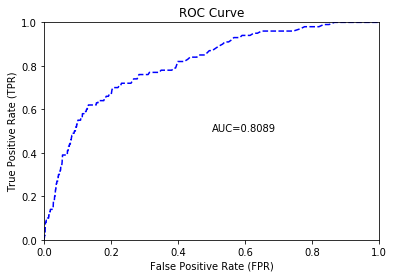

In [335]:
best_gbm_perf2.plot()

### Training the model and tuning hyperparameters to see the effect in metrics score

We will try to change the value of ntrees from 100 to 200 and also a case wherein number of trees change from 100 to 50 to see if there is any change in auc score. Then we can see how the values change with the value of hyperparameters. 

In [200]:
#trying to train the model and see if the auc is improved
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria = search_criteria
                          )
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}


In [201]:
gbm_grid2.train(x=X, y=y,
                training_frame=train_data,
                validation_frame=valid,
                ntrees=50,
                seed=1)
                

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [202]:
gbm_gridperf3 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf3

           col_sample_rate learn_rate max_depth         sample_rate  \
0                      1.0       0.09        10                 0.9   
1       0.7000000000000001       0.09        10                 0.5   
2                      1.0        0.1         9                 1.0   
3                      0.8       0.09        10  0.7000000000000001   
4                      0.8       0.05        10  0.6000000000000001   
5                      1.0        0.1         9                 0.8   
6                      0.5        0.1         9                 1.0   
7                      0.5        0.1         9                 0.8   
8       0.7000000000000001       0.08         9  0.6000000000000001   
9      0.30000000000000004       0.04        10                 0.9   
10                     0.2        0.1         9                 0.8   
11                     0.2        0.1         9                 1.0   
12      0.7000000000000001       0.04         8                 1.0   
13    

In [203]:
best_gbm3 = gbm_gridperf3.models[0]

In [204]:
best_gbm_perf3 = best_gbm3.model_performance(test)


In [205]:
best_gbm_perf3.auc()

0.982611460417262

### For runtime 1500 seconds


In [206]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=1500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

14Gag98ym


In [207]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\66Az1SQUw\xLLNTI7O5\14Gag98ym\logs   14Gag98ym_autoh2o_log.zip


In [208]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [209]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [210]:
metadata_1500 = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata_1500)

{'start_time': 1556318213.0160449, 'target': None, 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw\\xLLNTI7O5', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 1500, 'run_id': '14Gag98ym', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556318213.0160449, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw\\xLLNTI7O5\\14Gag98ym', 'nthreads': 1, 'min_mem_size': 1, 'analysis': 0}


In [211]:
generate_md = pd.DataFrame.from_dict(metadata_1500 , orient='index')
generate_md

,0
start_time,1.55632e+09
target,None
server_path,C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hy...
data_path,None
test_path,None
max_models,9
run_time,1500
run_id,14Gag98ym
scale,False
classification,False


In [212]:
generate_md.to_csv("metadata_1500.csv" , sep=",")

In [213]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:15332 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmpyuis7_m9
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmpyuis7_m9\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmpyuis7_m9\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:15332
Connecting to H2O server at http://127.0.0.1:15332 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_Ashmita_c8rjby
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [214]:
df.to_csv('train_1500.csv')

In [215]:
data_path = 'train_1500.csv'

In [216]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [217]:
train_data.head()

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,1,12,No,186,79,-29,9.57,81
1,3,1,1,12,No,186,79,-29,9.57,71
2,6,1,2,16,No,65,4,-49.5,29.7,32
3,6,1,2,16,No,60,4,-39.6,23.76,32
4,6,1,2,16,No,79,61,-19.8,11.88,41
5,9,2,2,25,No,66,140,-121,42.35,44
6,6,1,2,16,No,47,140,-39.6,23.76,32
7,6,1,2,16,No,63,4,-108.9,65.34,29
8,6,1,2,16,No,57,129,-19.8,11.88,44
9,6,1,2,16,No,186,4,-99,59.4,37


In [218]:
target ='Claim'

In [219]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [220]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Age', 'Net Sales', 'Commision (in value)']
Claim


In [221]:
# setup autoML
run_time=1500
aml = H2OAutoML(max_runtime_secs=run_time)

In [222]:
#logs_path = os.getcwd()
#logfile = 'logs3.txt'

In [223]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [224]:
# view leaderboard
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_183803_model_4,0.830238,0.0650706,0.367795,0.117751,0.0138652
GBM_grid_1_AutoML_20190426_183803_model_8,0.827402,0.0717851,0.372572,0.119368,0.0142488
GBM_1_AutoML_20190426_183803,0.827331,0.067494,0.384803,0.121015,0.0146447
GBM_grid_1_AutoML_20190426_183803_model_15,0.827179,0.0667605,0.396928,0.118153,0.0139602
GBM_grid_1_AutoML_20190426_183803_model_14,0.827045,0.0718965,0.352341,0.119372,0.0142497
GBM_grid_1_AutoML_20190426_183803_model_1,0.826982,0.0659424,0.381922,0.117969,0.0139166
GBM_grid_1_AutoML_20190426_183803_model_10,0.826892,0.0648103,0.398938,0.117821,0.0138817
StackedEnsemble_BestOfFamily_AutoML_20190426_183803,0.825841,0.0676355,0.350127,0.11897,0.0141538
GBM_grid_1_AutoML_20190426_183803_model_7,0.825369,0.0723651,0.358832,0.119478,0.014275
GBM_2_AutoML_20190426_183803,0.824834,0.0656903,0.385391,0.118846,0.0141244


In [225]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [226]:
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_grid_1_AutoML_20190426_183803_model_4,0.830238,0.065071,0.367795,0.117751,0.013865
1,GBM_grid_1_AutoML_20190426_183803_model_8,0.827402,0.071785,0.372572,0.119368,0.014249
2,GBM_1_AutoML_20190426_183803,0.827331,0.067494,0.384803,0.121015,0.014645
3,GBM_grid_1_AutoML_20190426_183803_model_15,0.827179,0.066761,0.396928,0.118153,0.013960
4,GBM_grid_1_AutoML_20190426_183803_model_14,0.827045,0.071896,0.352341,0.119372,0.014250
5,GBM_grid_1_AutoML_20190426_183803_model_1,0.826982,0.065942,0.381922,0.117969,0.013917
6,GBM_grid_1_AutoML_20190426_183803_model_10,0.826892,0.064810,0.398938,0.117821,0.013882
7,StackedEnsemble_BestOfFamily_AutoML_20190426_183803,0.825841,0.067636,0.350127,0.118970,0.014154
8,GBM_grid_1_AutoML_20190426_183803_model_7,0.825369,0.072365,0.358832,0.119478,0.014275
9,GBM_2_AutoML_20190426_183803,0.824834,0.065690,0.385391,0.118846,0.014124


In [227]:
aml_leaderboard_df.to_csv('model_metrics_1500.csv' , sep=',')

In [228]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [229]:

mod_best._id

'GBM_grid_1_AutoML_20190426_183803_model_4'

In [230]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_183803_model_4',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_183803_model_4'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train_1500.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train_1500.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [231]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)
     

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_183803_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_183803_model_4'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_183803_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_183803_model_4'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

In [232]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_grid_1_AutoML_20190426_183803_model_4
GBM_grid_1_AutoML_20190426_183803_model_8
GBM_1_AutoML_20190426_183803
GBM_grid_1_AutoML_20190426_183803_model_15
GBM_grid_1_AutoML_20190426_183803_model_14
GBM_grid_1_AutoML_20190426_183803_model_1
GBM_grid_1_AutoML_20190426_183803_model_10
StackedEnsemble_BestOfFamily_AutoML_20190426_183803
GBM_grid_1_AutoML_20190426_183803_model_7
GBM_2_AutoML_20190426_183803
GBM_grid_1_AutoML_20190426_183803_model_5
GBM_grid_1_AutoML_20190426_183803_model_3
GBM_3_AutoML_20190426_183803
GBM_grid_1_AutoML_20190426_183803_model_2
GBM_5_AutoML_20190426_183803
GBM_grid_1_AutoML_20190426_183803_model_12
GBM_grid_1_AutoML_20190426_183803_model_16
GBM_4_AutoML_20190426_183803
GBM_grid_1_AutoML_20190426_183803_model_9
GBM_grid_1_AutoML_20190426_183803_model_11
GBM_grid_1_AutoML_20190426_183803_model_13
StackedEnsemble_AllModels_AutoML_20190426_183803
DeepLearning_1_AutoML_20190426_183803
GLM_grid_1_AutoML_20190426_183803_model_1
XRT_1_AutoML_20190426_183803
DRF_1_Au

In [233]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_183803_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_183803_model_4'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual

In [234]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_1500.json') 
hyperparameter_json(metadata,'meta_data_1500.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

### Trying to find best hyperparameters of each model


In [239]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

#splitds = train_data.split_frame(seed = 1)
#train = splitds[0]
#test = splitds[1]
#valid = splitds[2]
train,valid,test = train_data.split_frame(ratios=[0.8,0.09],seed=1234)

gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}
# Train and validate a cartesian grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)


In [242]:
gbm_grid2.train(x=X, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)


gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [243]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

          col_sample_rate learn_rate max_depth         sample_rate  \
0                     0.2       0.03         7                 1.0   
1                     0.4       0.08         5                 0.8   
2                     0.9       0.06         6                 0.9   
3                     0.2        0.1         3                 0.8   
4                     0.2       0.09         6                 1.0   
5      0.6000000000000001       0.05         4                 0.9   
6                     0.4       0.07         5                 0.5   
7                     0.4       0.01         6  0.6000000000000001   
8      0.6000000000000001       0.04         7                 0.8   
9                     0.2       0.06         7                 0.8   
10    0.30000000000000004       0.08         6                 0.8   
11                    0.9       0.08         6                 0.8   
12                    0.9       0.06         3                 0.8   
13                  

In [244]:
best_gbm2 = gbm_gridperf2.models[0]

In [245]:
best_gbm_perf2 = best_gbm2.model_performance(test)


In [246]:
best_gbm_perf2.auc()

0.8089018290940269

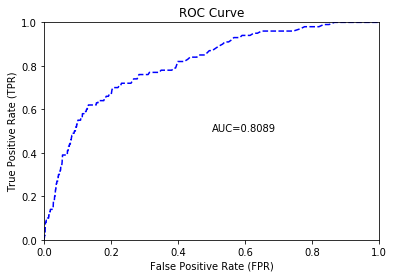

In [247]:
best_gbm_perf2.plot()

### For runtime = 2000 seconds



In [248]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=2000
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

AP4A7Og7g


In [249]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\66Az1SQUw\xLLNTI7O5\14Gag98ym\AP4A7Og7g\logs   AP4A7Og7g_autoh2o_log.zip


In [250]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [251]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [252]:
metadata_2000 = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata_2000)

{'start_time': 1556325663.300872, 'target': None, 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw\\xLLNTI7O5\\14Gag98ym', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 2000, 'run_id': 'AP4A7Og7g', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556325663.300872, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw\\xLLNTI7O5\\14Gag98ym\\AP4A7Og7g', 'nthreads': 1, 'min_mem_size': 2, 'analysis': 0}


In [253]:
generate_md = pd.DataFrame.from_dict(metadata_2000 , orient='index')
generate_md

,0
start_time,1.55633e+09
target,None
server_path,C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hy...
data_path,None
test_path,None
max_models,9
run_time,2000
run_id,AP4A7Og7g
scale,False
classification,False


In [254]:
generate_md.to_csv("metadata_2000.csv", sep=",")

In [255]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:49112 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmpnxjlwit0
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmpnxjlwit0\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmpnxjlwit0\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:49112
Connecting to H2O server at http://127.0.0.1:49112 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_Ashmita_120n5b
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [256]:
df.to_csv('train_2000.csv')

In [257]:
data_path = 'train_2000.csv'

In [258]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [259]:
train_data.head()

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,1,12,No,186,79,-29,9.57,81
1,3,1,1,12,No,186,79,-29,9.57,71
2,6,1,2,16,No,65,4,-49.5,29.7,32
3,6,1,2,16,No,60,4,-39.6,23.76,32
4,6,1,2,16,No,79,61,-19.8,11.88,41
5,9,2,2,25,No,66,140,-121,42.35,44
6,6,1,2,16,No,47,140,-39.6,23.76,32
7,6,1,2,16,No,63,4,-108.9,65.34,29
8,6,1,2,16,No,57,129,-19.8,11.88,44
9,6,1,2,16,No,186,4,-99,59.4,37


In [260]:
target ='Claim'

In [261]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [262]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Age', 'Net Sales', 'Commision (in value)']
Claim


In [263]:
# setup autoML
run_time=2000
aml = H2OAutoML(max_runtime_secs=run_time)

In [264]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [265]:
# view leaderboard
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_204240_model_1,0.830269,0.0647075,0.326948,0.118113,0.0139506
GBM_2_AutoML_20190426_204240,0.82803,0.0654139,0.37663,0.11871,0.014092
GBM_1_AutoML_20190426_204240,0.827771,0.0680498,0.361644,0.121408,0.01474
GBM_grid_1_AutoML_20190426_204240_model_8,0.827361,0.0671953,0.356341,0.118274,0.0139886
GBM_grid_1_AutoML_20190426_204240_model_6,0.826349,0.0656777,0.362794,0.117823,0.0138822
GBM_grid_1_AutoML_20190426_204240_model_7,0.825851,0.0661549,0.357169,0.118025,0.0139299
GBM_grid_1_AutoML_20190426_204240_model_4,0.82543,0.0720152,0.372929,0.119403,0.0142571
GBM_grid_1_AutoML_20190426_204240_model_16,0.82462,0.0651075,0.364177,0.117899,0.0139003
GBM_grid_1_AutoML_20190426_204240_model_11,0.821321,0.0663915,0.388664,0.118051,0.0139361
GBM_3_AutoML_20190426_204240,0.821092,0.0662941,0.333367,0.119257,0.0142221


In [266]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [267]:
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_grid_1_AutoML_20190426_204240_model_1,0.830269,0.064707,0.326948,0.118113,0.013951
1,GBM_2_AutoML_20190426_204240,0.828030,0.065414,0.376630,0.118710,0.014092
2,GBM_1_AutoML_20190426_204240,0.827771,0.068050,0.361644,0.121408,0.014740
3,GBM_grid_1_AutoML_20190426_204240_model_8,0.827361,0.067195,0.356341,0.118274,0.013989
4,GBM_grid_1_AutoML_20190426_204240_model_6,0.826349,0.065678,0.362794,0.117823,0.013882
5,GBM_grid_1_AutoML_20190426_204240_model_7,0.825851,0.066155,0.357169,0.118025,0.013930
6,GBM_grid_1_AutoML_20190426_204240_model_4,0.825430,0.072015,0.372929,0.119403,0.014257
7,GBM_grid_1_AutoML_20190426_204240_model_16,0.824620,0.065107,0.364177,0.117899,0.013900
8,GBM_grid_1_AutoML_20190426_204240_model_11,0.821321,0.066391,0.388664,0.118051,0.013936
9,GBM_3_AutoML_20190426_204240,0.821092,0.066294,0.333367,0.119257,0.014222


In [268]:
aml_leaderboard_df.to_csv("model_metrics_2000.csv", sep=",")

In [269]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [270]:

mod_best._id

'GBM_grid_1_AutoML_20190426_204240_model_1'

In [271]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_204240_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_204240_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train_2000.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train_2000.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [272]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)
     

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_204240_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_204240_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_2000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_2000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_204240_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_204240_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_2000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_2000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

In [273]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_grid_1_AutoML_20190426_204240_model_1
GBM_2_AutoML_20190426_204240
GBM_1_AutoML_20190426_204240
GBM_grid_1_AutoML_20190426_204240_model_8
GBM_grid_1_AutoML_20190426_204240_model_6
GBM_grid_1_AutoML_20190426_204240_model_7
GBM_grid_1_AutoML_20190426_204240_model_4
GBM_grid_1_AutoML_20190426_204240_model_16
GBM_grid_1_AutoML_20190426_204240_model_11
GBM_3_AutoML_20190426_204240
StackedEnsemble_AllModels_AutoML_20190426_204240
GBM_5_AutoML_20190426_204240
StackedEnsemble_BestOfFamily_AutoML_20190426_204240
GBM_4_AutoML_20190426_204240
GBM_grid_1_AutoML_20190426_204240_model_12
GBM_grid_1_AutoML_20190426_204240_model_14
DeepLearning_grid_1_AutoML_20190426_204240_model_3
GBM_grid_1_AutoML_20190426_204240_model_10
GBM_grid_1_AutoML_20190426_204240_model_9
GLM_grid_1_AutoML_20190426_204240_model_1
DeepLearning_grid_1_AutoML_20190426_204240_model_4
DRF_1_AutoML_20190426_204240
GBM_grid_1_AutoML_20190426_204240_model_3
DeepLearning_1_AutoML_20190426_204240
XRT_1_AutoML_20190426_204240
DeepL

In [274]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_204240_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_204240_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_2000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_2000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual

In [276]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_2000.json') 
hyperparameter_json(metadata,'meta_data_2000.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

In [279]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

#splitds = train_data.split_frame(seed = 1)
#train = splitds[0]
#test = splitds[1]
#valid = splitds[2]
train,valid,test = train_data.split_frame(ratios=[0.8,0.09],seed=1234)

gbm_params4 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 40, 'seed': 1}
# Train and validate a cartesian grid of GBMs
gbm_grid4 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid4',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)


In [280]:
gbm_grid4.train(x=X, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)


gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [282]:
gbm_gridperf4 = gbm_grid4.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf4

          col_sample_rate learn_rate max_depth         sample_rate  \
0                     0.2       0.03         7                 1.0   
1                     0.9       0.06         6                 0.9   
2                     0.5       0.09         4                 0.8   
3                     0.5       0.01         7  0.7000000000000001   
4                     0.2        0.1         3                 0.8   
5                     0.2       0.09         6                 1.0   
6      0.6000000000000001       0.05         4                 0.9   
7                     0.4       0.07         5                 0.5   
8      0.6000000000000001       0.04         7                 0.8   
9                     0.2       0.06         7                 0.8   
10    0.30000000000000004       0.08         6                 0.8   
11                    0.9       0.08         6                 0.8   
12                    0.9       0.06         3                 0.8   
13                  

In [283]:
best_gbm4 = gbm_gridperf4.models[0]

In [284]:
best_gbm_perf4 = best_gbm4.model_performance(test)

In [285]:
best_gbm_perf4.auc()

0.8089018290940269

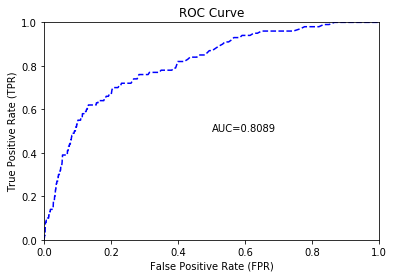

In [286]:
best_gbm_perf4.plot()

### For runtime 2500 seconds

In [289]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=2500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

IBmtNb82b


In [290]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\66Az1SQUw\xLLNTI7O5\14Gag98ym\AP4A7Og7g\IBmtNb82b\logs   IBmtNb82b_autoh2o_log.zip


In [291]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [292]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [293]:
metadata_2500 = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata_2500)

{'start_time': 1556331700.818772, 'target': None, 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw\\xLLNTI7O5\\14Gag98ym\\AP4A7Og7g', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 2500, 'run_id': 'IBmtNb82b', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556331700.818772, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\66Az1SQUw\\xLLNTI7O5\\14Gag98ym\\AP4A7Og7g\\IBmtNb82b', 'nthreads': 1, 'min_mem_size': 2, 'analysis': 0}


In [294]:
generate_md = pd.DataFrame.from_dict(metadata_2500 , orient='index')
generate_md

,0
start_time,1.55633e+09
target,None
server_path,C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hy...
data_path,None
test_path,None
max_models,9
run_time,2500
run_id,IBmtNb82b
scale,False
classification,False


In [295]:
generate_md.to_csv("metadata_2500.csv", sep=",")

In [296]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:42490 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmpr4_jwde7
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmpr4_jwde7\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmpr4_jwde7\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:42490
Connecting to H2O server at http://127.0.0.1:42490 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_Ashmita_r8q3on
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [297]:
df.to_csv('train_2500.csv')

In [298]:
data_path = 'train_2500.csv'

In [299]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [300]:
train_data.head()

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,1,12,No,186,79,-29,9.57,81
1,3,1,1,12,No,186,79,-29,9.57,71
2,6,1,2,16,No,65,4,-49.5,29.7,32
3,6,1,2,16,No,60,4,-39.6,23.76,32
4,6,1,2,16,No,79,61,-19.8,11.88,41
5,9,2,2,25,No,66,140,-121,42.35,44
6,6,1,2,16,No,47,140,-39.6,23.76,32
7,6,1,2,16,No,63,4,-108.9,65.34,29
8,6,1,2,16,No,57,129,-19.8,11.88,44
9,6,1,2,16,No,186,4,-99,59.4,37


In [301]:
target ='Claim'

In [302]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [303]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

In [304]:
X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Age', 'Net Sales', 'Commision (in value)']
Claim


In [305]:
# setup autoML
run_time=2500
aml = H2OAutoML(max_runtime_secs=run_time)

In [306]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [307]:
# view leaderboard
lb_2500 = aml.leaderboard
lb_2500

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_222255_model_16,0.832835,0.0661085,0.356244,0.117975,0.0139182
GBM_grid_1_AutoML_20190426_222255_model_8,0.830672,0.0646075,0.345304,0.117877,0.0138949
GBM_1_AutoML_20190426_222255,0.829429,0.0675553,0.375084,0.120774,0.0145864
GBM_grid_1_AutoML_20190426_222255_model_10,0.826248,0.066309,0.353471,0.118031,0.0139313
StackedEnsemble_BestOfFamily_AutoML_20190426_222255,0.826059,0.0679794,0.356653,0.119336,0.0142412
GBM_grid_1_AutoML_20190426_222255_model_28,0.824979,0.073026,0.358763,0.119608,0.014306
GBM_2_AutoML_20190426_222255,0.823901,0.0658904,0.411058,0.118872,0.0141307
GBM_grid_1_AutoML_20190426_222255_model_19,0.821427,0.0720128,0.373648,0.119407,0.014258
StackedEnsemble_AllModels_AutoML_20190426_222255,0.820934,0.0671849,0.35641,0.118807,0.0141152
GBM_3_AutoML_20190426_222255,0.819943,0.0666097,0.34613,0.119442,0.0142664


In [308]:
# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [309]:
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_grid_1_AutoML_20190426_222255_model_16,0.832835,0.066109,0.356244,0.117975,0.013918
1,GBM_grid_1_AutoML_20190426_222255_model_8,0.830672,0.064608,0.345304,0.117877,0.013895
2,GBM_1_AutoML_20190426_222255,0.829429,0.067555,0.375084,0.120774,0.014586
3,GBM_grid_1_AutoML_20190426_222255_model_10,0.826248,0.066309,0.353471,0.118031,0.013931
4,StackedEnsemble_BestOfFamily_AutoML_20190426_222255,0.826059,0.067979,0.356653,0.119336,0.014241
5,GBM_grid_1_AutoML_20190426_222255_model_28,0.824979,0.073026,0.358763,0.119608,0.014306
6,GBM_2_AutoML_20190426_222255,0.823901,0.065890,0.411058,0.118872,0.014131
7,GBM_grid_1_AutoML_20190426_222255_model_19,0.821427,0.072013,0.373648,0.119407,0.014258
8,StackedEnsemble_AllModels_AutoML_20190426_222255,0.820934,0.067185,0.356410,0.118807,0.014115
9,GBM_3_AutoML_20190426_222255,0.819943,0.066610,0.346130,0.119442,0.014266


In [310]:
aml_leaderboard_df.to_csv("model_metrics_2500.csv", sep=",")

In [311]:
# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [312]:
mod_best._id

'GBM_grid_1_AutoML_20190426_222255_model_16'

In [313]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_222255_model_16',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_222255_model_16'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train_2500.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train_2500.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},

In [314]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_222255_model_16', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_222255_model_16'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_2500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_2500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actua

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_222255_model_16', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_222255_model_16'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_2500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_2500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actua

In [315]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_grid_1_AutoML_20190426_222255_model_16
GBM_grid_1_AutoML_20190426_222255_model_8
GBM_1_AutoML_20190426_222255
GBM_grid_1_AutoML_20190426_222255_model_10
StackedEnsemble_BestOfFamily_AutoML_20190426_222255
GBM_grid_1_AutoML_20190426_222255_model_28
GBM_2_AutoML_20190426_222255
GBM_grid_1_AutoML_20190426_222255_model_19
StackedEnsemble_AllModels_AutoML_20190426_222255
GBM_3_AutoML_20190426_222255
GBM_grid_1_AutoML_20190426_222255_model_17
GBM_5_AutoML_20190426_222255
GBM_grid_1_AutoML_20190426_222255_model_13
GBM_grid_1_AutoML_20190426_222255_model_9
GBM_grid_1_AutoML_20190426_222255_model_15
GBM_grid_1_AutoML_20190426_222255_model_25
GBM_grid_1_AutoML_20190426_222255_model_2
GBM_grid_1_AutoML_20190426_222255_model_30
GBM_4_AutoML_20190426_222255
GBM_grid_1_AutoML_20190426_222255_model_20
GBM_grid_1_AutoML_20190426_222255_model_18
GBM_grid_1_AutoML_20190426_222255_model_12
GBM_grid_1_AutoML_20190426_222255_model_22
GBM_grid_1_AutoML_20190426_222255_model_24
GLM_grid_1_AutoML_20190426

In [316]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190426_222255_model_16', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190426_222255_model_16'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_2500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_2500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actu

In [317]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_2500.json') 
hyperparameter_json(metadata,'meta_data_2500.json') 

### Identifying best hyperparameters for each model

We will make use of GridSearchCV and RandomSearchCV to search for hyperparameters

In [325]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

#splitds = train_data.split_frame(seed = 1)
#train = splitds[0]
#test = splitds[1]
#valid = splitds[2]
train,valid,test = train_data.split_frame(ratios=[0.8,0.09],seed=1234)

gbm_params5 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}
# Train and validate a cartesian grid of GBMs
gbm_grid5 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)


In [326]:
gbm_grid5.train(x=X, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)


gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [328]:
gbm_gridperf5 = gbm_grid5.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf5

          col_sample_rate learn_rate max_depth         sample_rate  \
0                     0.2       0.03         7                 1.0   
1                     0.4       0.08         5                 0.8   
2                     0.9       0.06         6                 0.9   
3                     0.2        0.1         3                 0.8   
4                     0.2       0.09         6                 1.0   
5      0.6000000000000001       0.05         4                 0.9   
6                     0.4       0.07         5                 0.5   
7                     0.4       0.01         6  0.6000000000000001   
8      0.6000000000000001       0.04         7                 0.8   
9                     0.2       0.06         7                 0.8   
10    0.30000000000000004       0.08         6                 0.8   
11                    0.9       0.08         6                 0.8   
12                    0.9       0.06         3                 0.8   
13                  

In [329]:
best_gbm5 = gbm_gridperf5.models[0]


In [330]:
best_gbm_perf5 = best_gbm5.model_performance(test)

In [331]:
best_gbm_perf5.auc()

0.8089018290940269

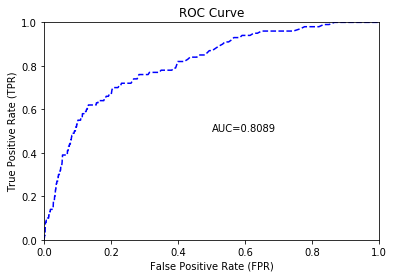

In [333]:
best_gbm_perf5.plot()

## Conclusion 

We have found out various hyperparameters for each model and their corresponding values are obtained in the JSON and CSV files. 

We see that important hyperparameters are obtained using GridSearchCV and RandomSearchCV. We have found AUC for best model and plotted the AUC curve. We see that AUC score improves with this hyperparameter search. 

We also have found the range of values of different hyperparameters for each model for 5 different runtimes. We have seen that if we change the value of ntrees then the auc score changes, either improves or decreases. 

With more number of trees, auc value has declined. Lesser the number of trees fetches good auc score.

### Contribution 

Code developed by our team : 60%

Code referred from internet and other samples : 40%


### Citations 

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

https://towardsdatascience.com/pandas-dataframe-playing-with-csv-files-944225d19ff

https://blog.floydhub.com/guide-to-hyperparameters-search-for-deep-learning-models/

https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#grid-search-in-python

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm-faq/tuning_a_gbm.html

https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/random%20hyperparmeter%20search%20and%20roadmap.md


### License 



Copyright 2019 Ashmita Nigam 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
